In [2]:
import pandas as pd
import numpy as np

df=pd.read_csv("nobel.csv")

In [3]:
df.head(10)

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France
5,1901,Physics,The Nobel Prize in Physics 1901,"""in recognition of the extraordinary services ...",1/1,1,Individual,Wilhelm Conrad Röntgen,1845-03-27,Lennep (Remscheid),Prussia (Germany),Male,Munich University,Munich,Germany,1923-02-10,Munich,Germany
6,1902,Chemistry,The Nobel Prize in Chemistry 1902,"""in recognition of the extraordinary services ...",1/1,161,Individual,Hermann Emil Fischer,1852-10-09,Euskirchen,Prussia (Germany),Male,Berlin University,Berlin,Germany,1919-07-15,Berlin,Germany
7,1902,Literature,The Nobel Prize in Literature 1902,"""the greatest living master of the art of hist...",1/1,571,Individual,Christian Matthias Theodor Mommsen,1817-11-30,Garding,Schleswig (Germany),Male,NaN,NaN,NaN,1903-11-01,Charlottenburg,Germany
8,1902,Medicine,The Nobel Prize in Physiology or Medicine 1902,"""for his work on malaria, by which he has show...",1/1,294,Individual,Ronald Ross,1857-05-13,Almora,India,Male,University College,Liverpool,United Kingdom,1932-09-16,Putney Heath,United Kingdom
9,1902,Peace,The Nobel Peace Prize 1902,NaN,1/2,464,Individual,Élie Ducommun,1833-02-19,Geneva,Switzerland,Male,NaN,NaN,NaN,1906-12-07,Bern,Switzerland


In [8]:
top_ten_winning_countries=df['birth_country'].value_counts().head(10)
print(top_ten_winning_countries)

United States of America    259
United Kingdom               85
Germany                      61
France                       51
Sweden                       29
Japan                        24
Canada                       18
Netherlands                  18
Italy                        17
Russia                       17
Name: birth_country, dtype: int64


In [12]:
import pandas as pd
pd.set_option('display.max_columns', None)  
pd.set_option('display.width', 1000) 
female_winners = df[df["sex"] == "Female"]
female_winners = female_winners.dropna(subset=["birth_country"])
female_winners = female_winners.sort_values("year")
first_female_winners = female_winners.drop_duplicates(subset=["category"], keep="first")
print(first_female_winners[["full_name", "birth_country", "category","year"]])

                                             full_name                     birth_country    category  year
19                         Marie Curie, née Sklodowska           Russian Empire (Poland)     Physics  1903
29   Baroness Bertha Sophie Felicita von Suttner, n...  Austrian Empire (Czech Republic)       Peace  1905
51                       Selma Ottilia Lovisa Lagerlöf                            Sweden  Literature  1909
62                         Marie Curie, née Sklodowska           Russian Empire (Poland)   Chemistry  1911
235                    Gerty Theresa Cori, née Radnitz  Austria-Hungary (Czech Republic)    Medicine  1947
819                                      Elinor Ostrom          United States of America   Economics  2009


In [13]:
import pandas as pd
pd.set_option('display.max_columns', None)  
pd.set_option('display.width', 1000) 
male_winners = df[df["sex"] == "Male"]
male_winners = male_winners.dropna(subset=["birth_country"])
male_winners = male_winners.sort_values("year")
first_male_winners = male_winners.drop_duplicates(subset=["category"], keep="first")
print(first_male_winners[["full_name", "birth_country", "category","year"]])

                        full_name      birth_country    category  year
0    Jacobus Henricus van 't Hoff        Netherlands   Chemistry  1901
1                 Sully Prudhomme             France  Literature  1901
2          Emil Adolf von Behring   Prussia (Poland)    Medicine  1901
3               Jean Henry Dunant        Switzerland       Peace  1901
5          Wilhelm Conrad Röntgen  Prussia (Germany)     Physics  1901
393                 Ragnar Frisch             Norway   Economics  1969


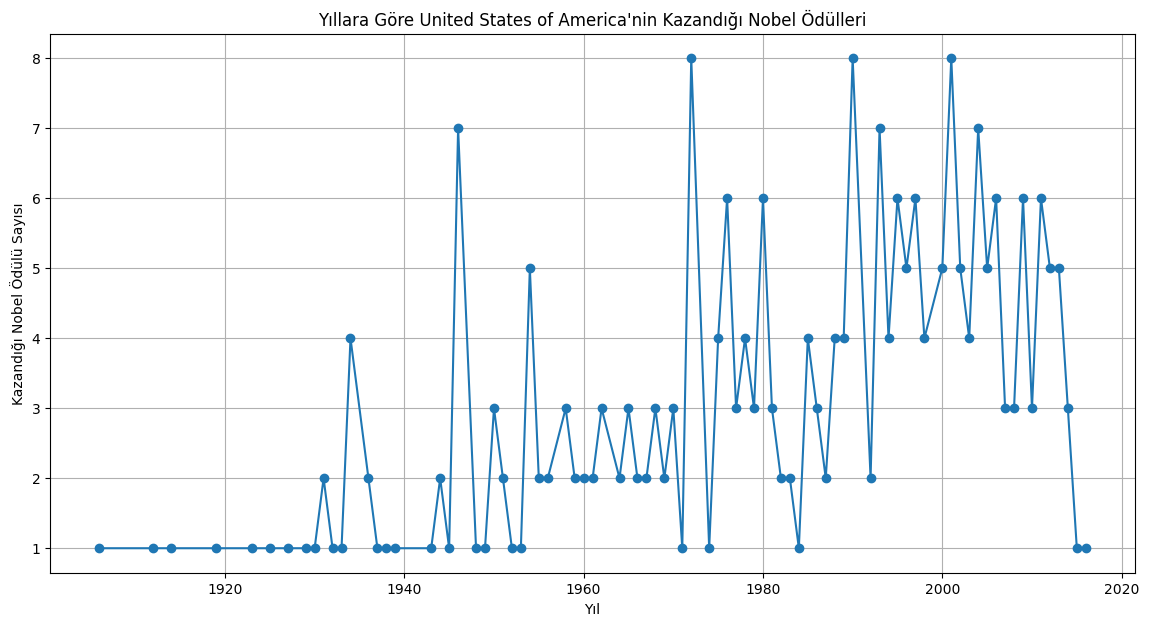

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

birth_country = "United States of America"
country_winners = df[df['birth_country'] == birth_country]
country_winners_count = country_winners.groupby('year').size().reset_index(name='count')
plt.figure(figsize=(14, 7))
plt.plot(country_winners_count['year'], country_winners_count['count'], marker='o', linestyle='-')
plt.xlabel('Yıl')
plt.ylabel('Kazandığı Nobel Ödülü Sayısı')
plt.title(f'Yıllara Göre {birth_country}\'nin Kazandığı Nobel Ödülleri')
plt.grid(True)
plt.show()


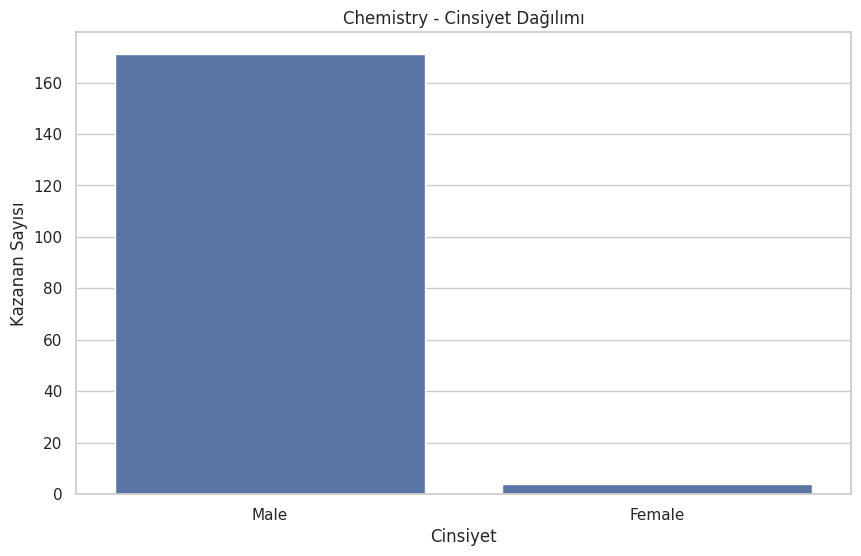

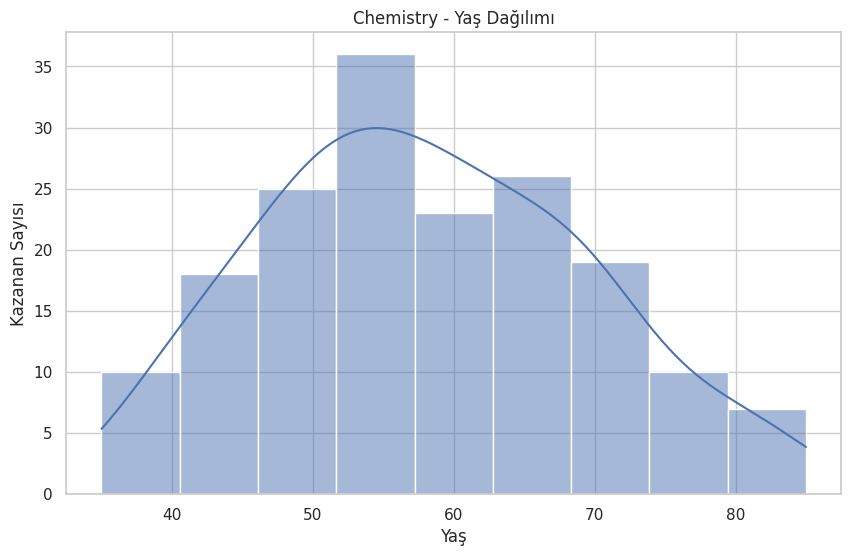

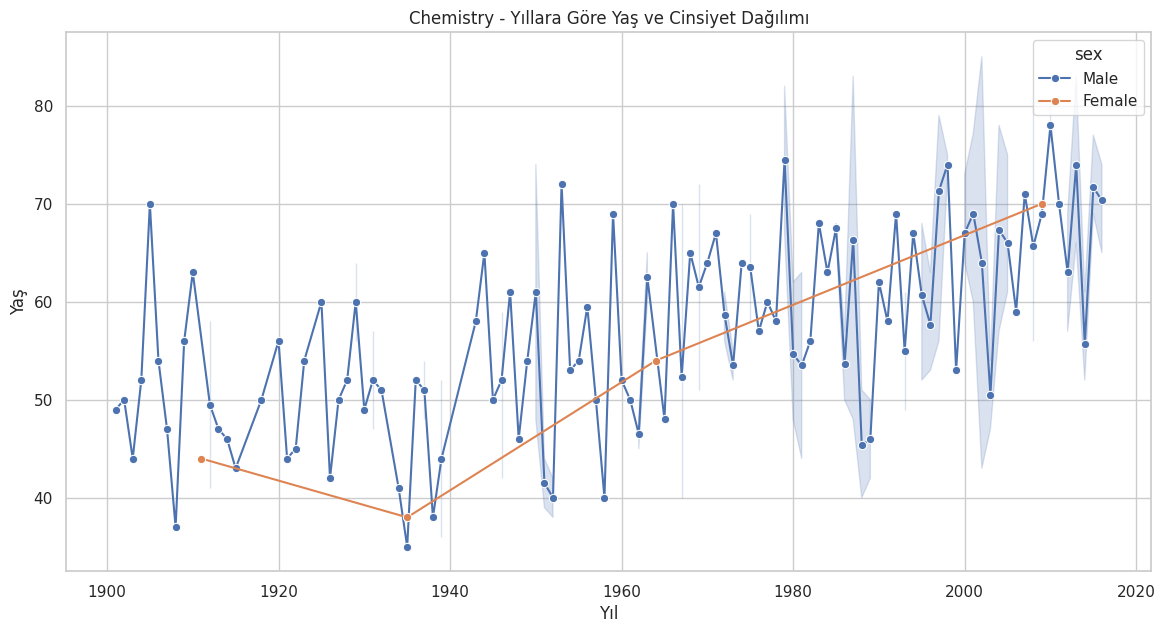

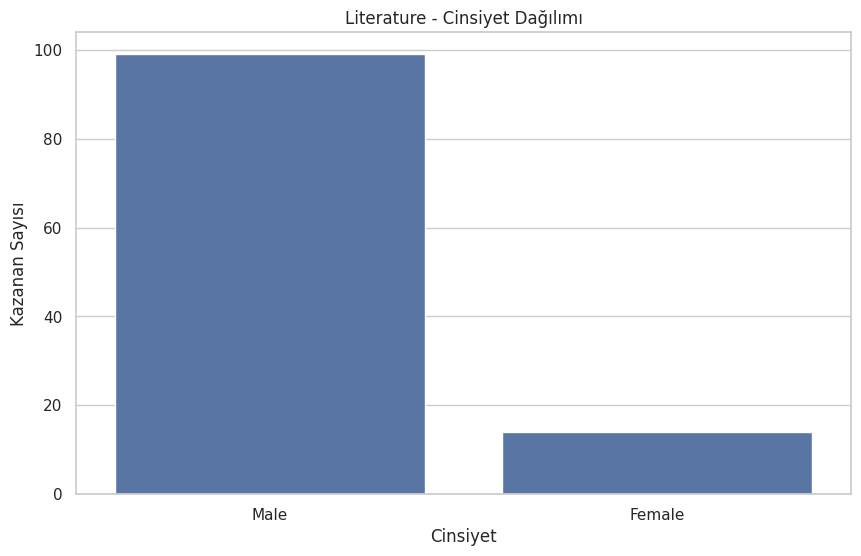

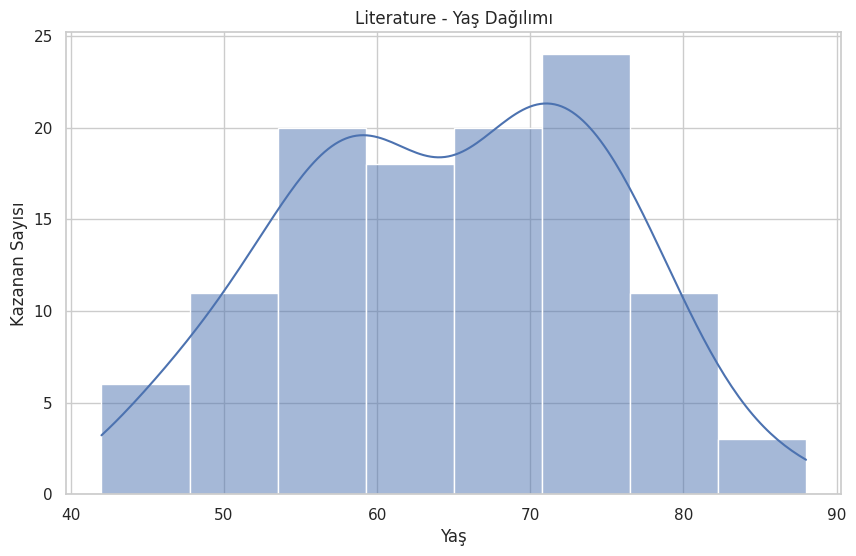

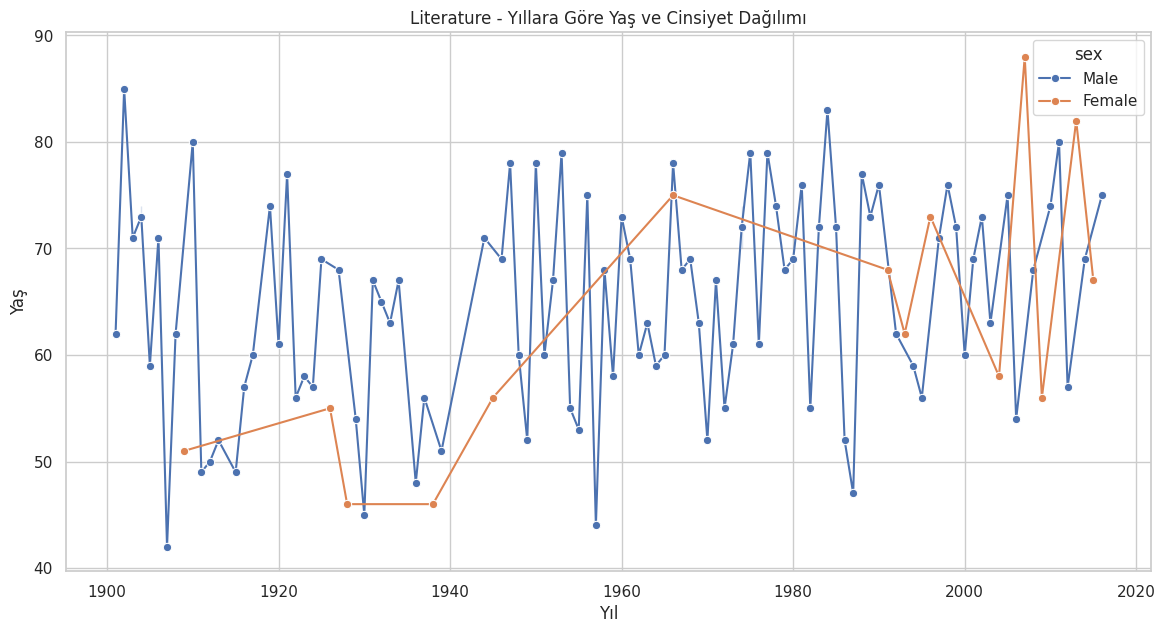

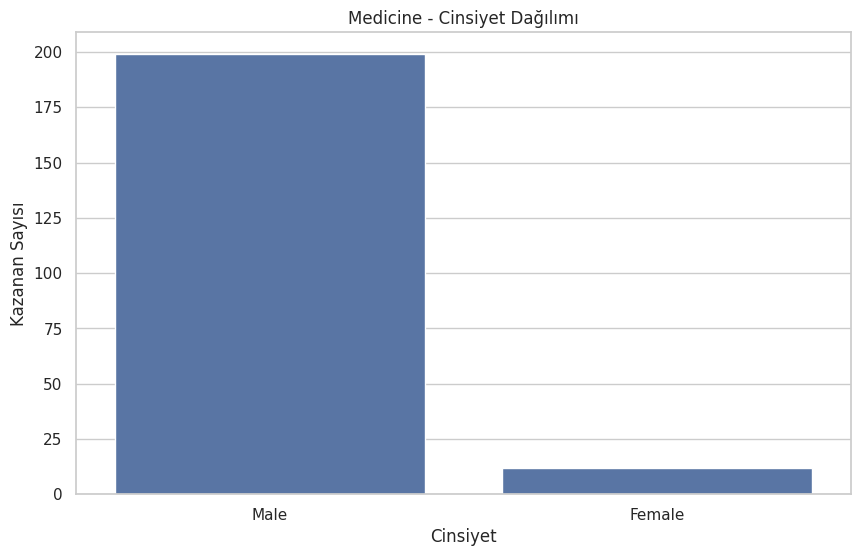

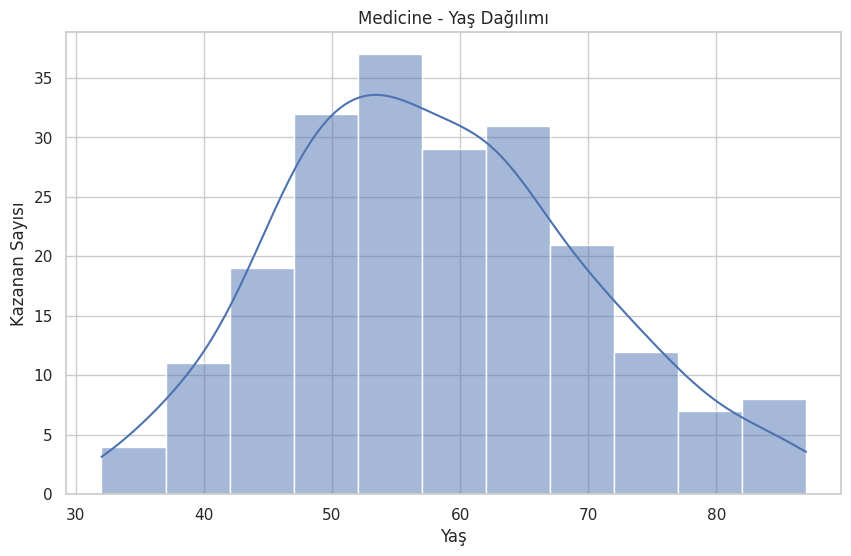

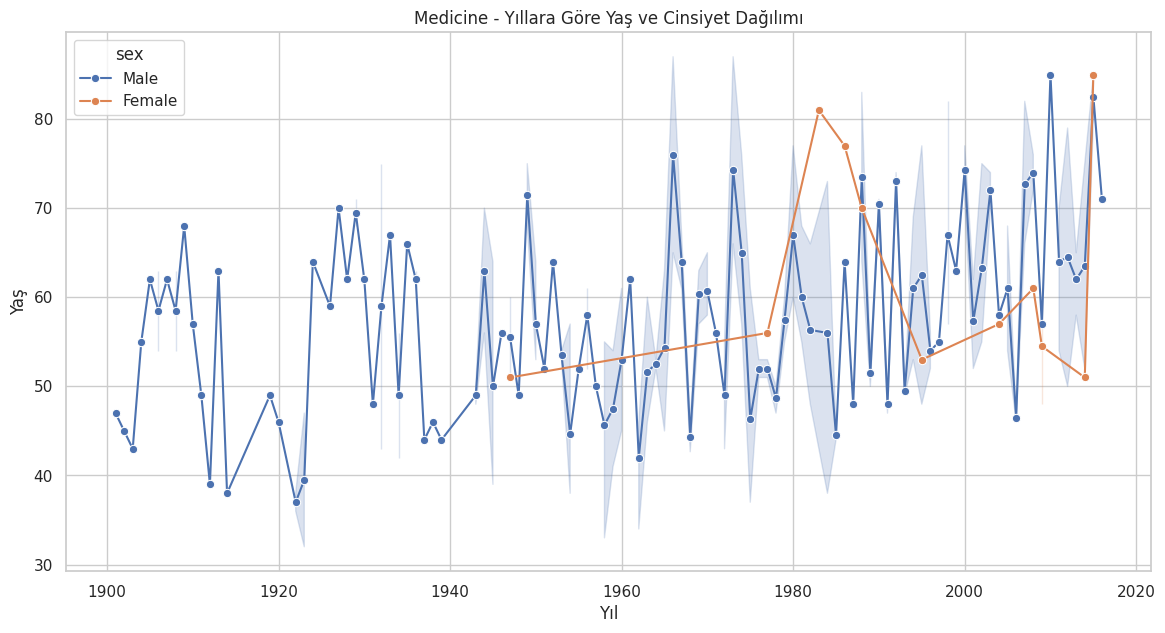

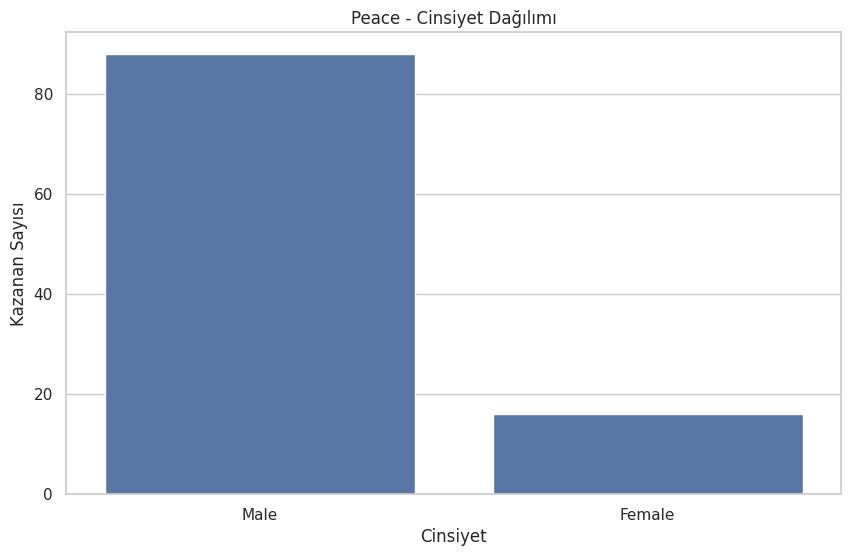

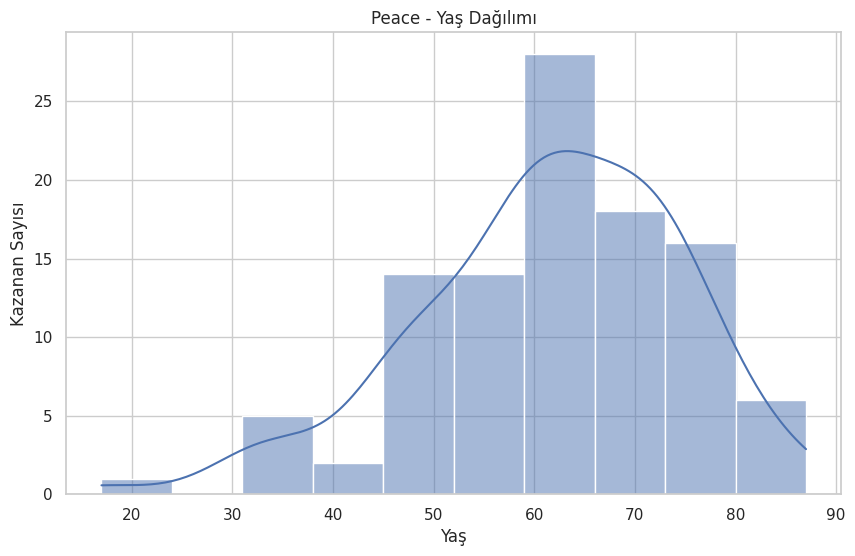

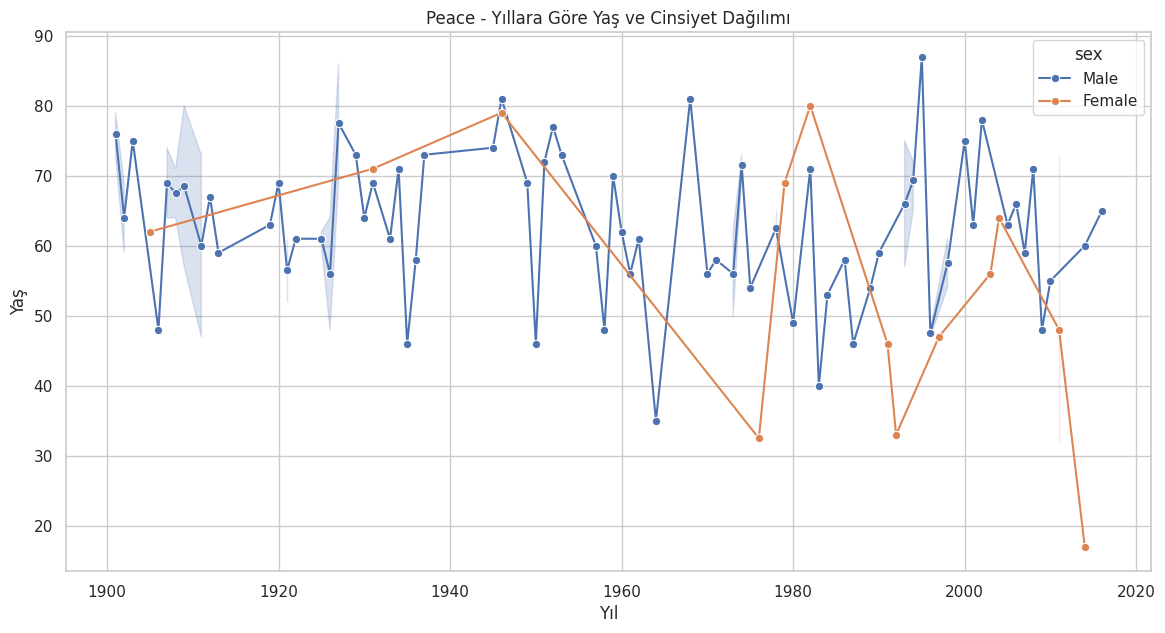

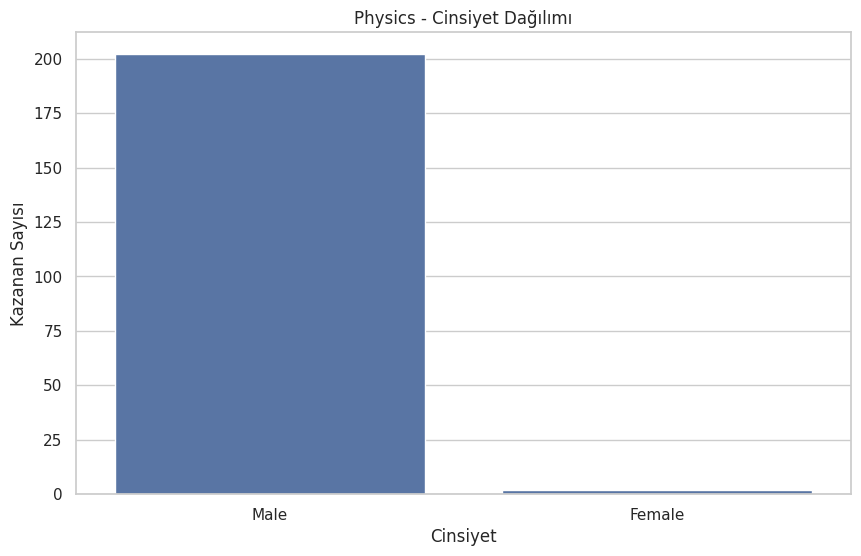

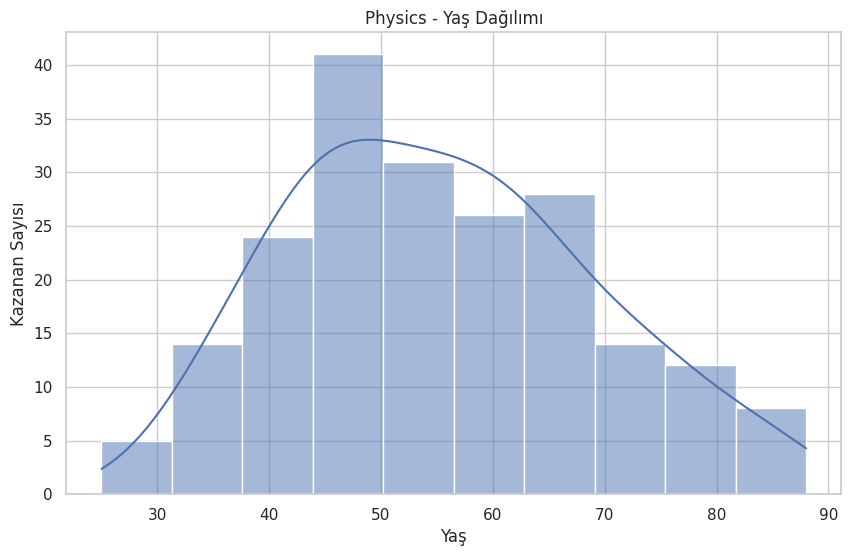

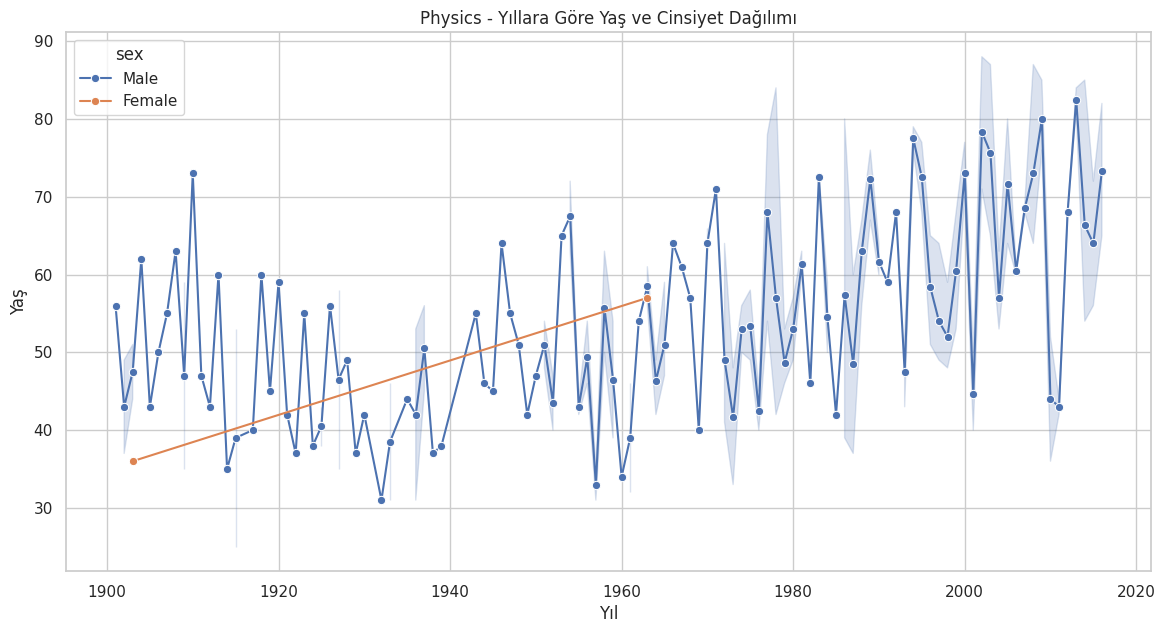

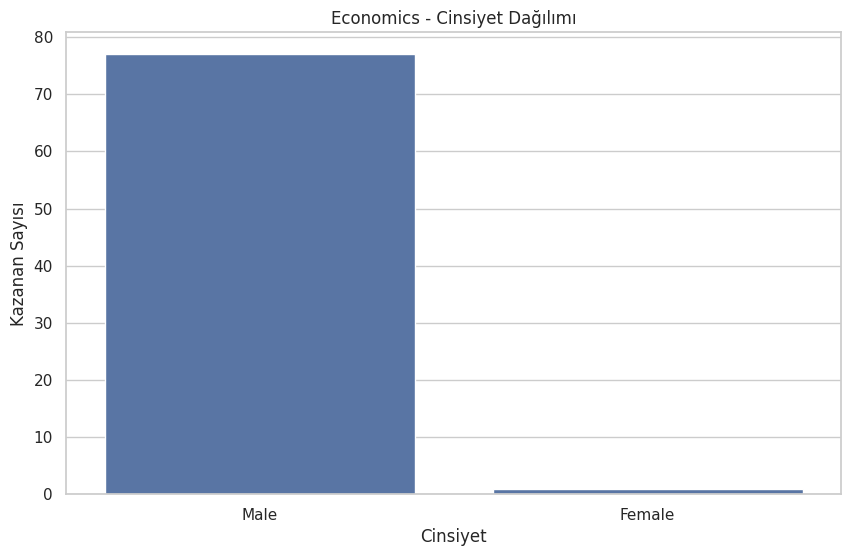

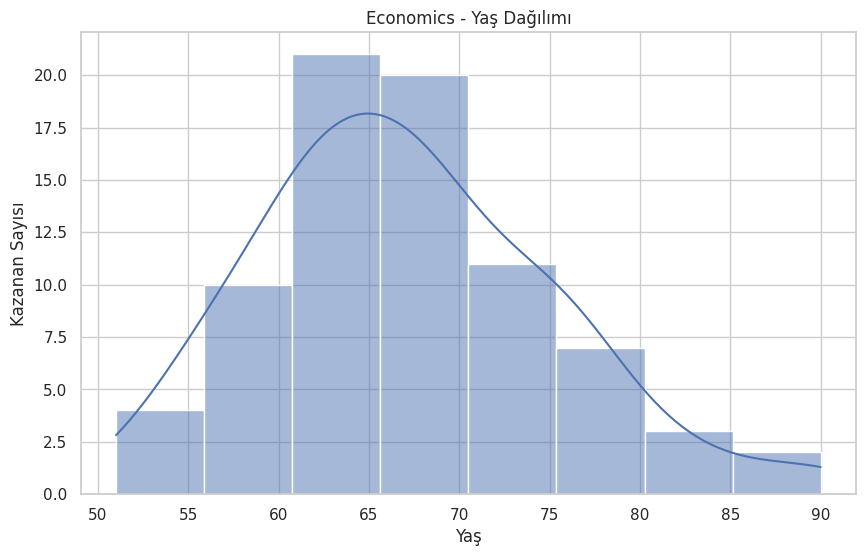

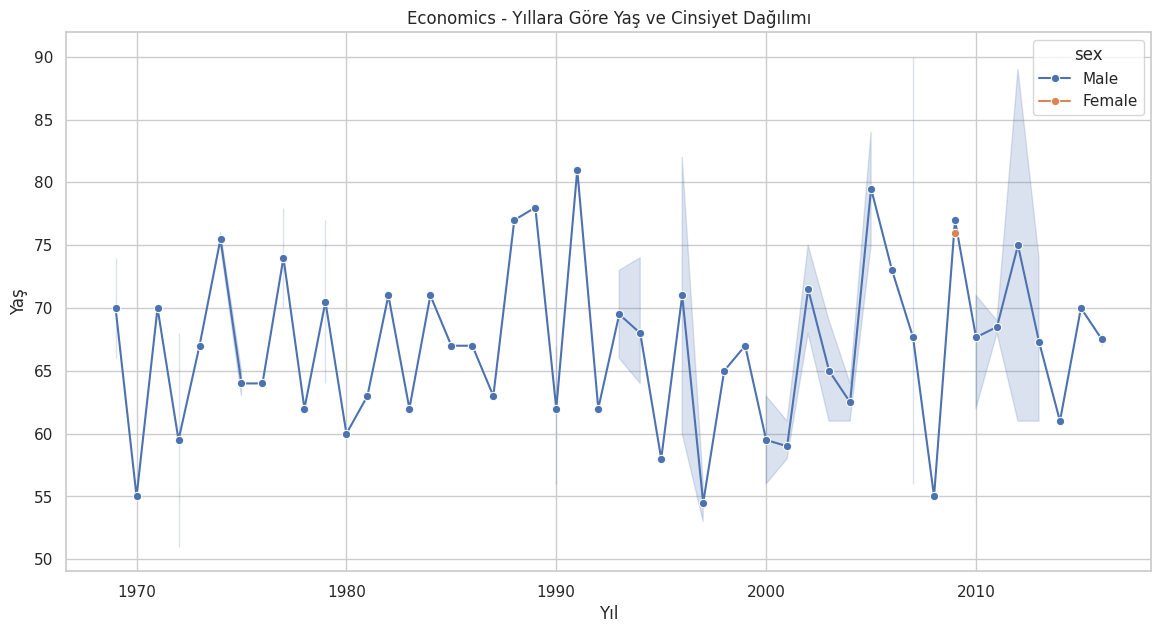

In [36]:
%pip install seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("nobel.csv")
df = df[['year', 'category', 'full_name', 'birth_date', 'sex']]

df['birth_date'] = pd.to_datetime(df['birth_date'], errors='coerce')
df['age'] = df['year'] - df['birth_date'].dt.year
categories = df['category'].unique()
sns.set(style="whitegrid")
for category in categories:
    category_data = df[df['category'] == category]
    plt.figure(figsize=(10, 6))
    sns.countplot(data=category_data, x='sex')
    plt.title(f'{category} - Cinsiyet Dağılımı')
    plt.xlabel('Cinsiyet')
    plt.ylabel('Kazanan Sayısı')
    plt.show()
    plt.figure(figsize=(10, 6))
    sns.histplot(data=category_data, x='age', kde=True)
    plt.title(f'{category} - Yaş Dağılımı')
    plt.xlabel('Yaş')
    plt.ylabel('Kazanan Sayısı')
    plt.show()
    plt.figure(figsize=(14, 7))
    sns.lineplot(data=category_data, x='year', y='age', hue='sex', marker='o')
    plt.title(f'{category} - Yıllara Göre Yaş ve Cinsiyet Dağılımı')
    plt.xlabel('Yıl')
    plt.ylabel('Yaş')
    plt.show()


<Figure size 1400x700 with 0 Axes>

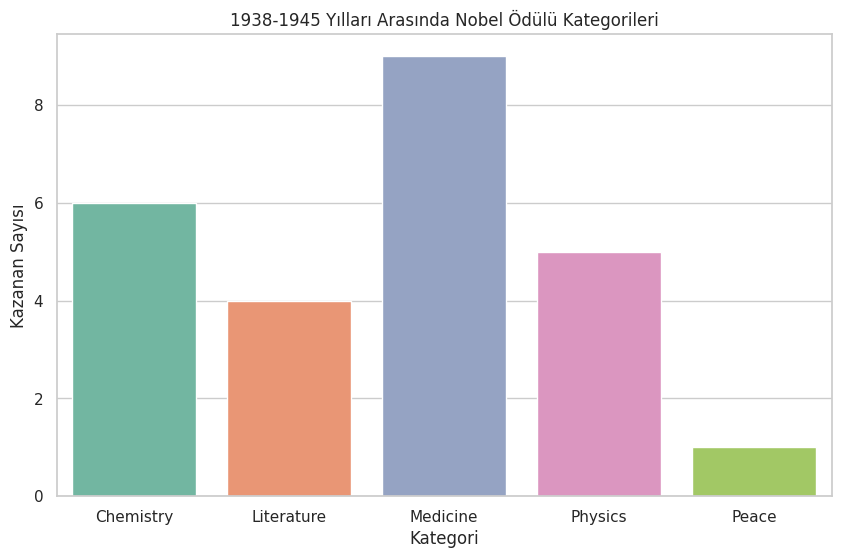

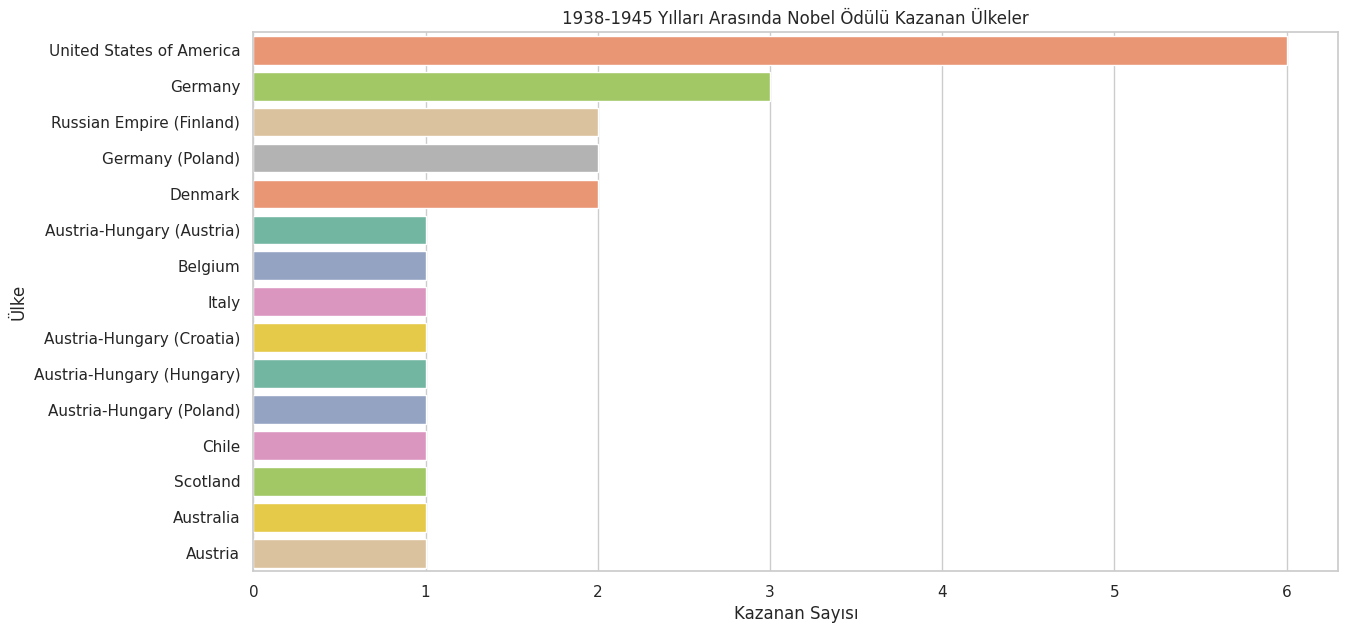

In [18]:
%pip install seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('nobel.csv')
df_filtered = df[(df['year'] >= 1938) & (df['year'] <= 1945)]
df_filtered = df_filtered[['year', 'category', 'birth_country']].dropna()
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(data=df_filtered, x='category',hue='category', palette='Set2',dodge=False, legend=False)
plt.title('1938-1945 Yılları Arasında Nobel Ödülü Kategorileri')
plt.xlabel('Kategori')
plt.ylabel('Kazanan Sayısı')
plt.show()
plt.figure(figsize=(14, 7))
sns.countplot(data=df_filtered, y='birth_country',hue='birth_country', palette='Set2', dodge=False, 
legend=False, order=df_filtered['birth_country'].value_counts().index)
plt.title('1938-1945 Yılları Arasında Nobel Ödülü Kazanan Ülkeler')
plt.xlabel('Kazanan Sayısı')
plt.ylabel('Ülke')
plt.show()


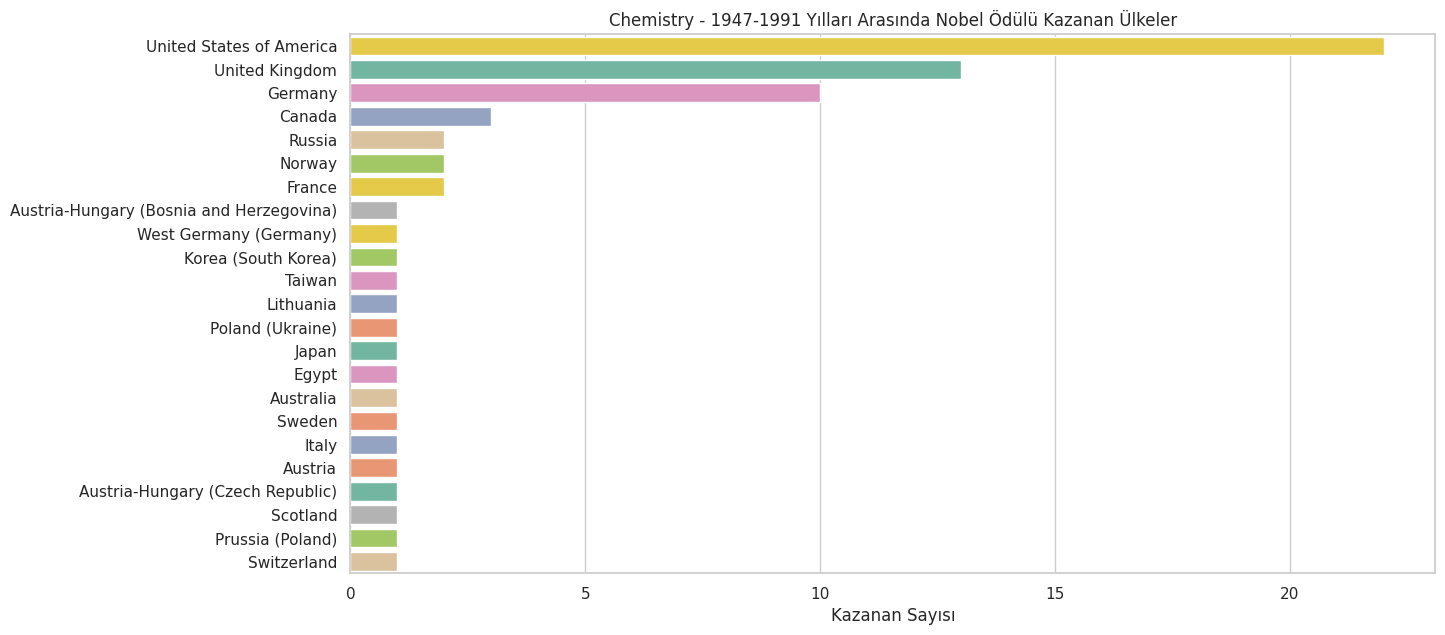

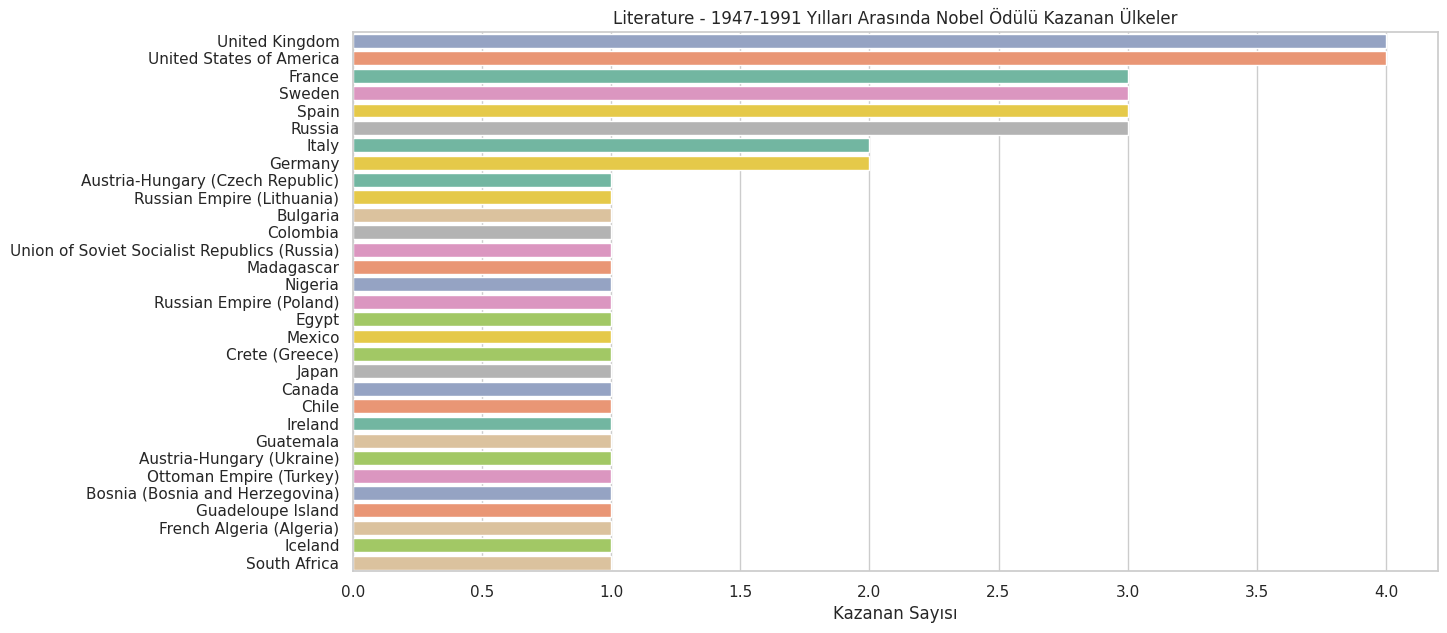

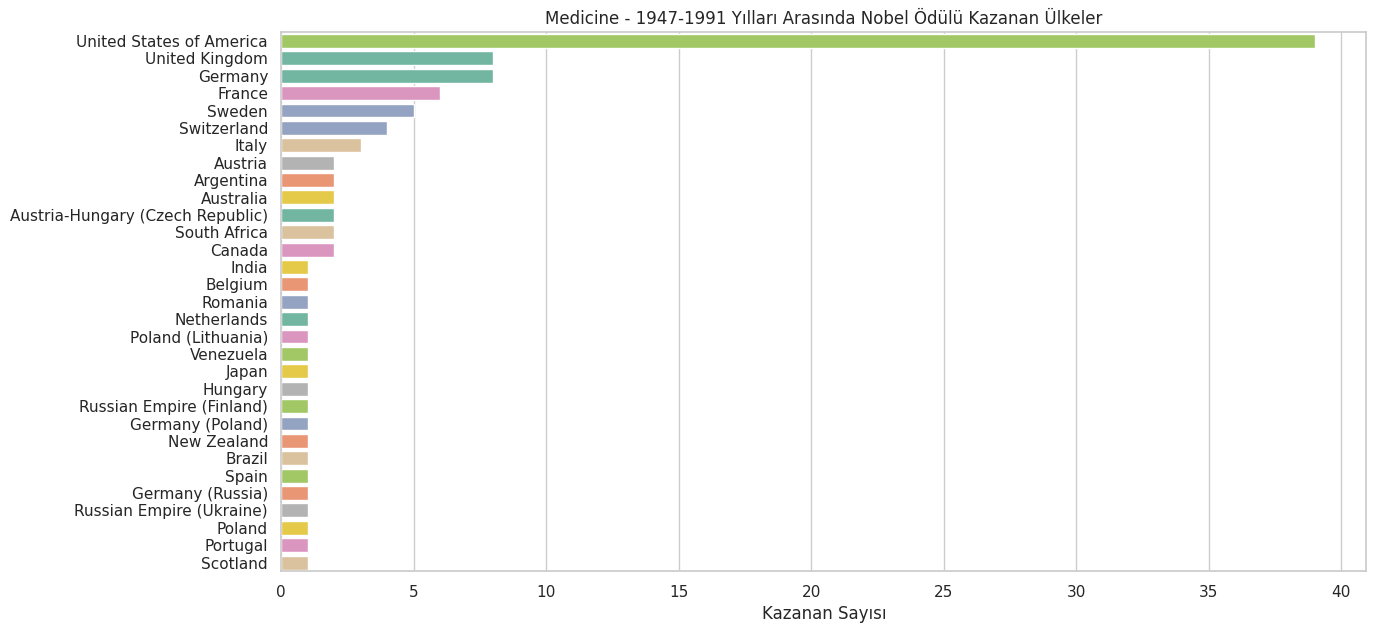

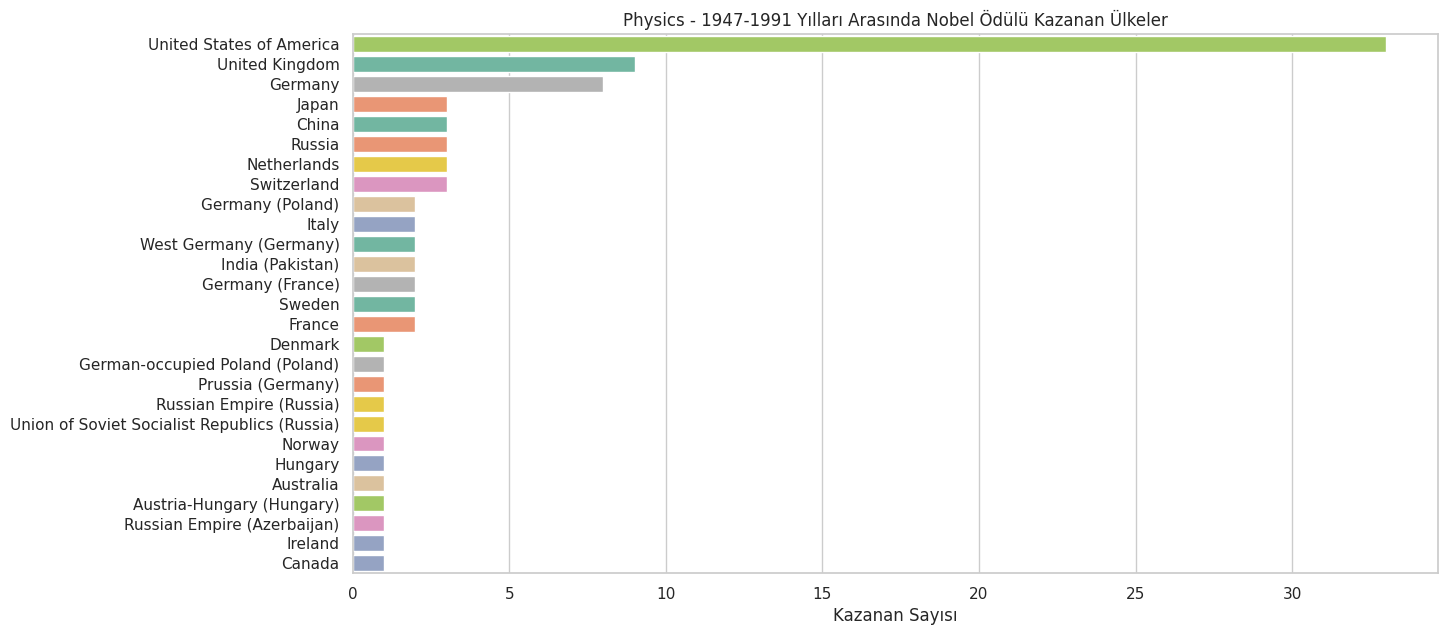

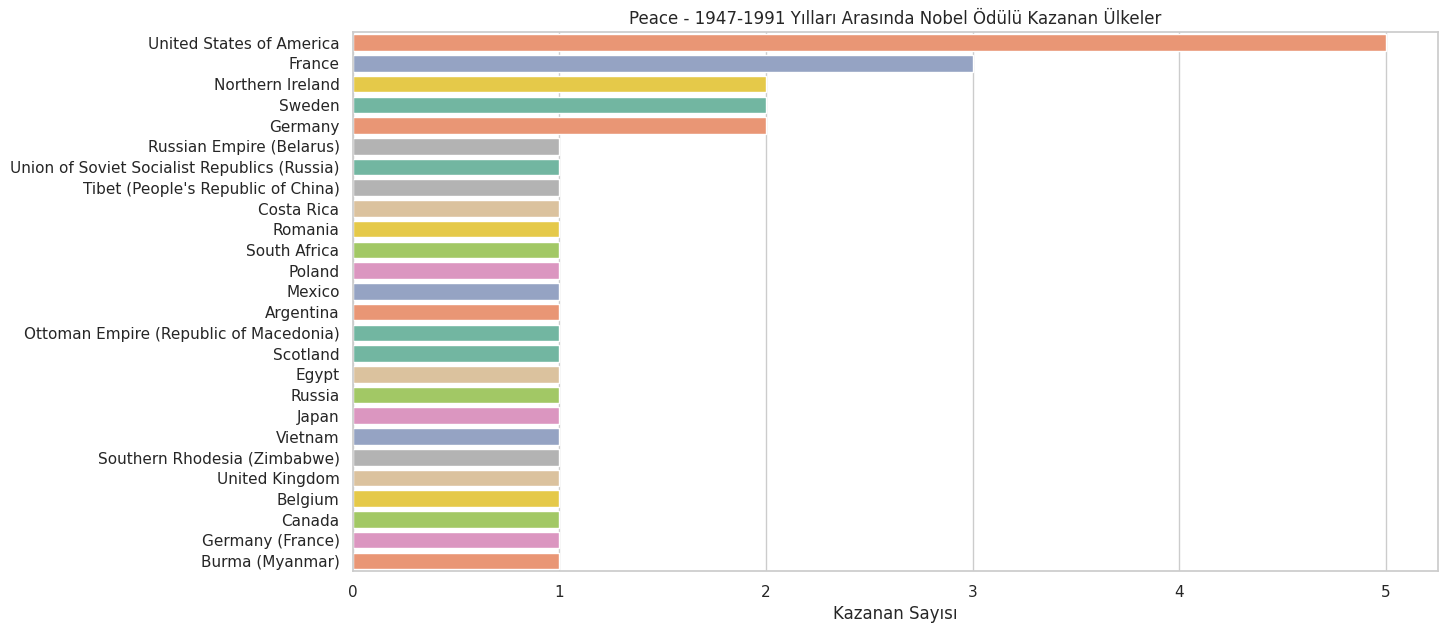

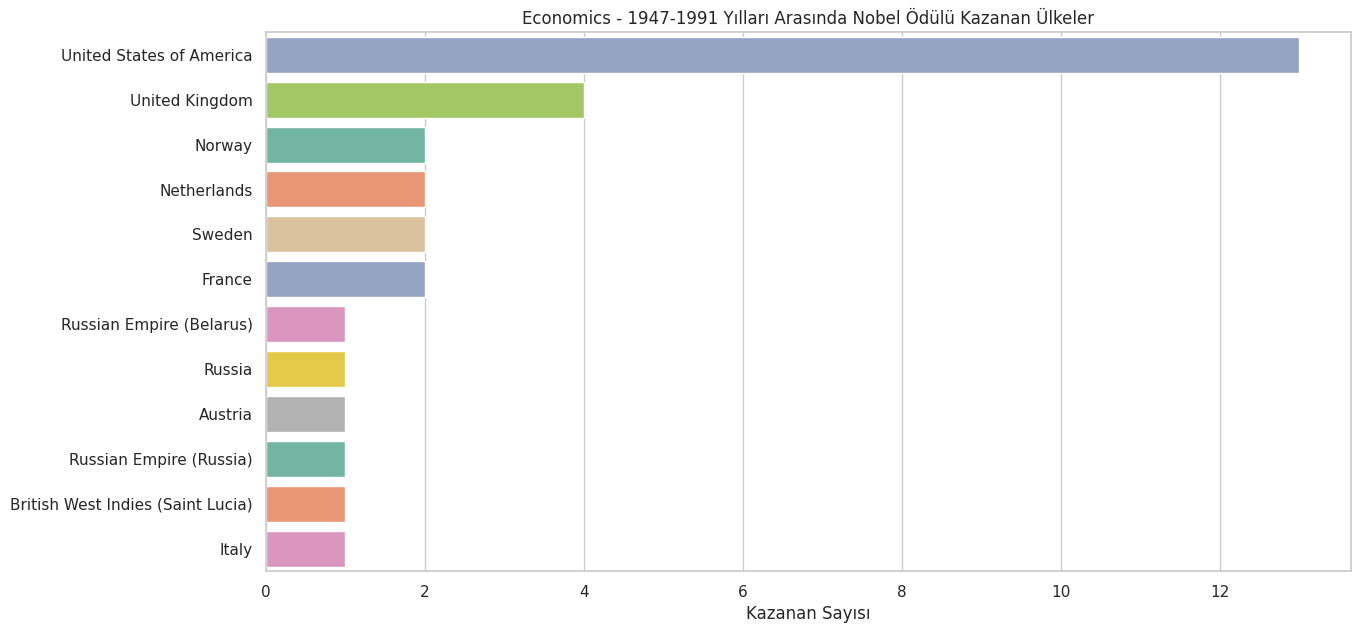

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('nobel.csv')
df_filtered = df[(df['year'] >= 1947) & (df['year'] <= 1991)]
df_filtered = df_filtered[['year', 'category', 'birth_country']].dropna()
categories = df_filtered['category'].unique()
sns.set(style="whitegrid")
for category in categories:
    category_data = df_filtered[df_filtered['category'] == category]
    plt.figure(figsize=(14, 7))
    sns.countplot(data=category_data, y='birth_country', hue='birth_country', palette='Set2', dodge=False, 
                  legend=False, order=category_data['birth_country'].value_counts().index)
    plt.title(f'{category} - 1947-1991 Yılları Arasında Nobel Ödülü Kazanan Ülkeler')
    plt.xlabel('Kazanan Sayısı')
    plt.ylabel('')
    plt.show()

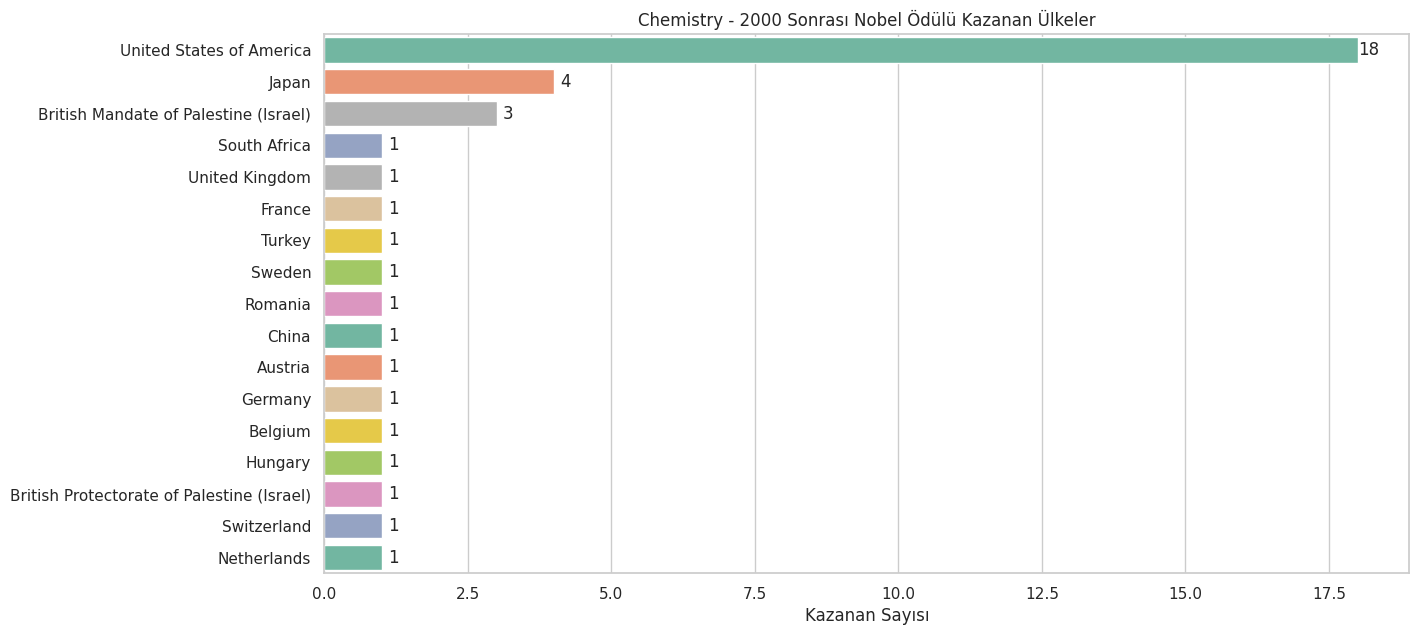

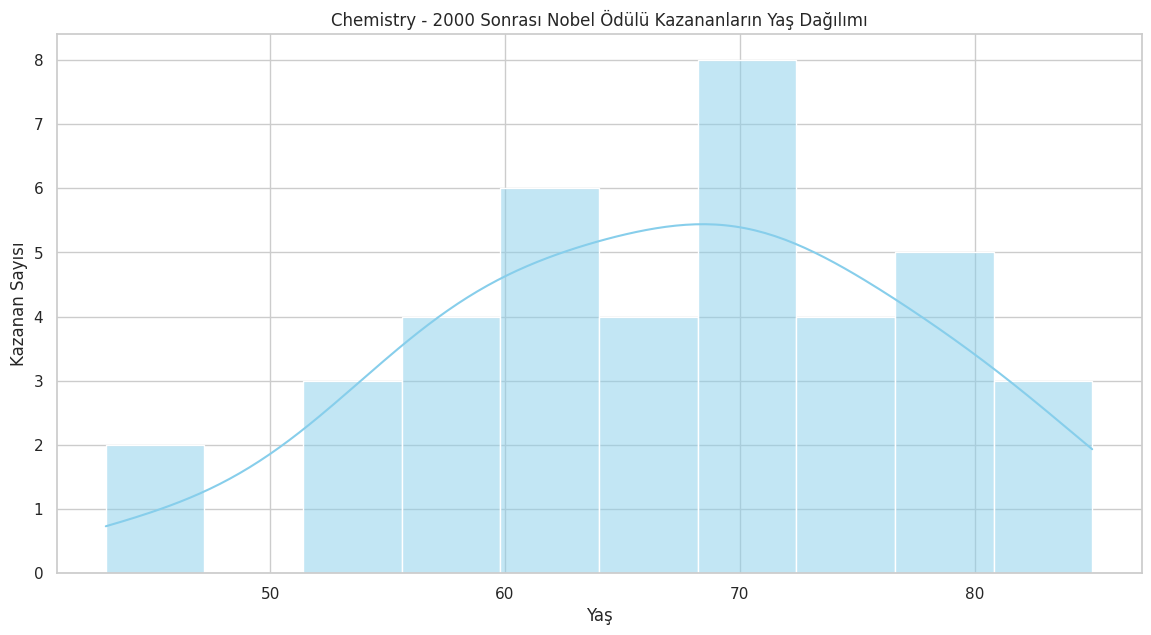

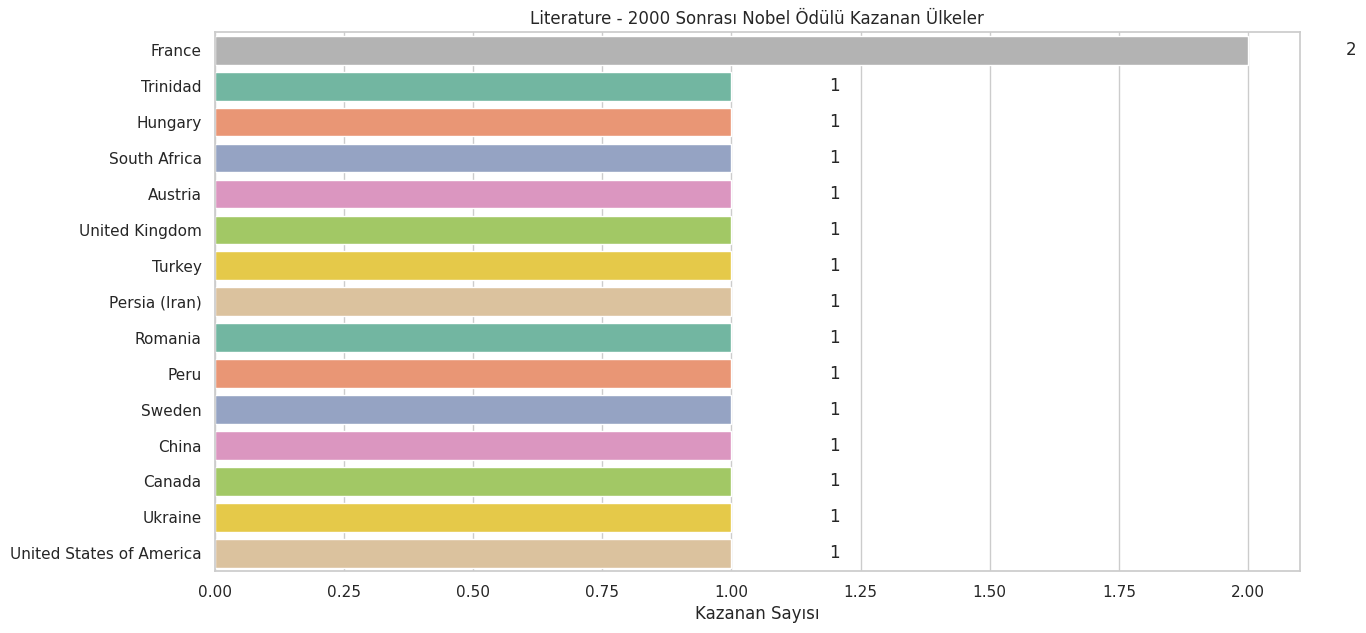

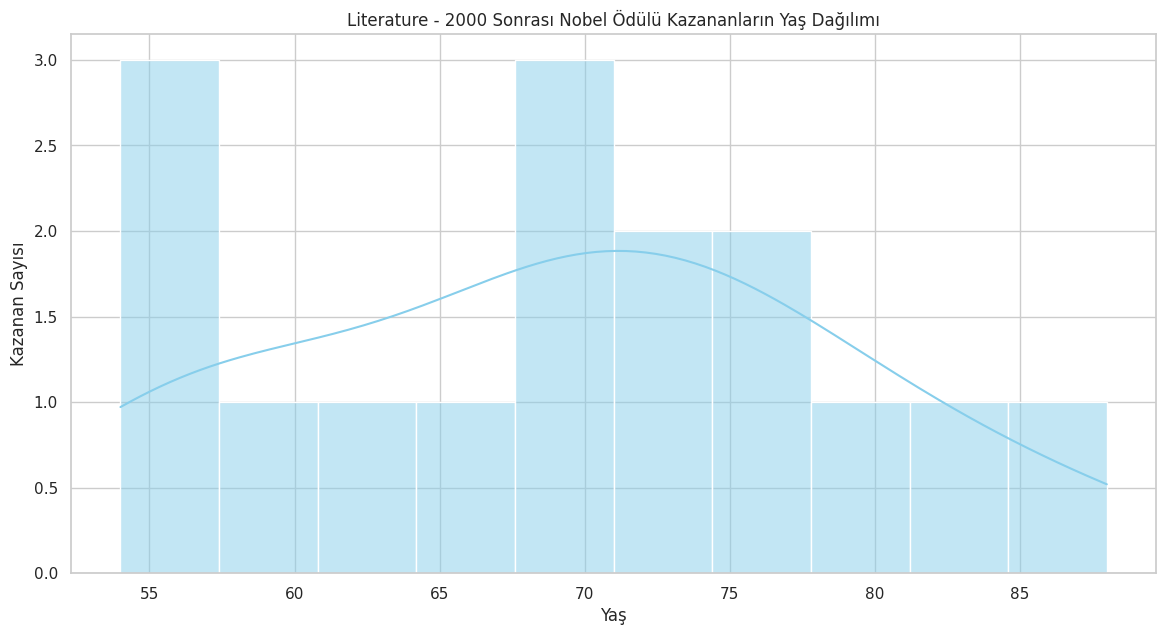

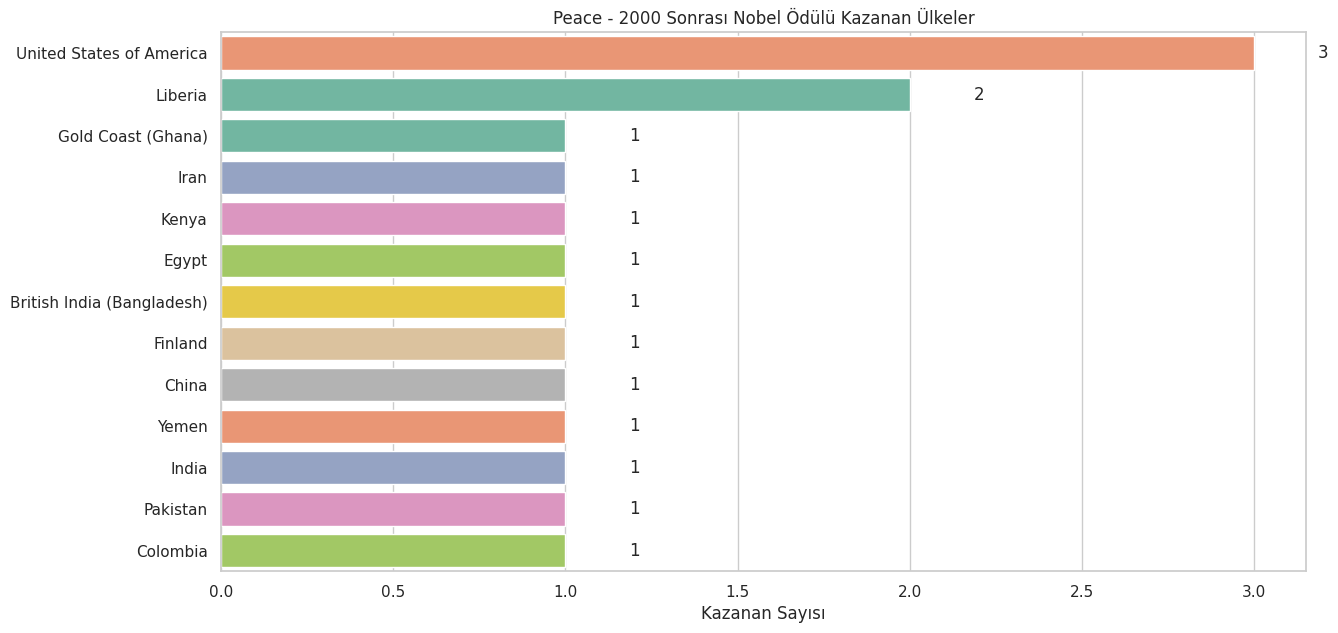

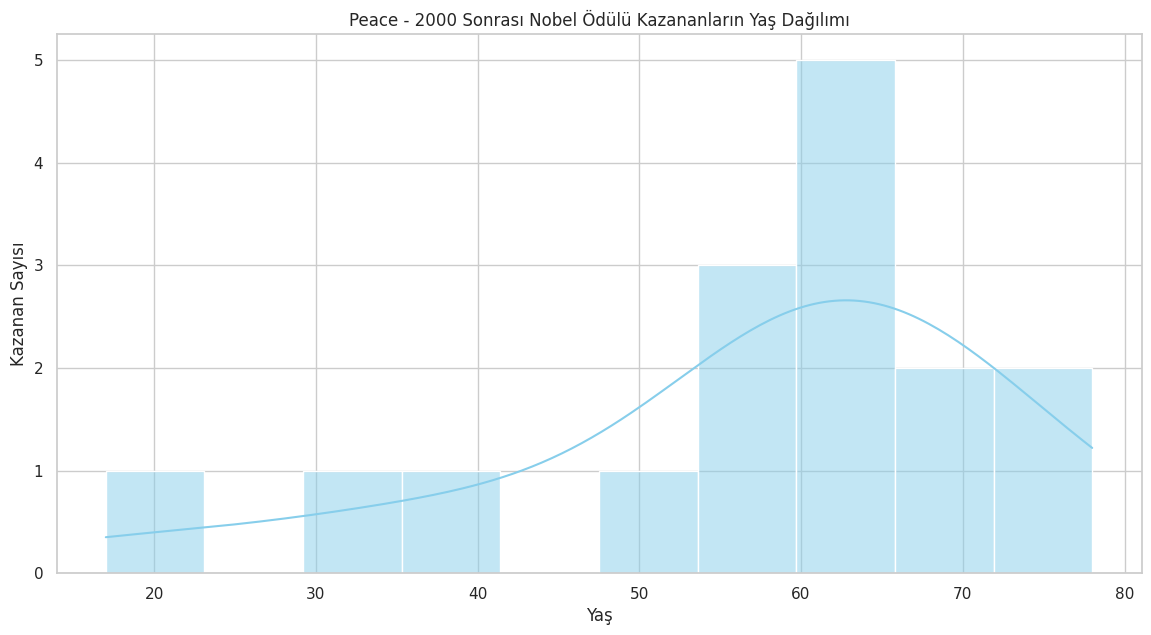

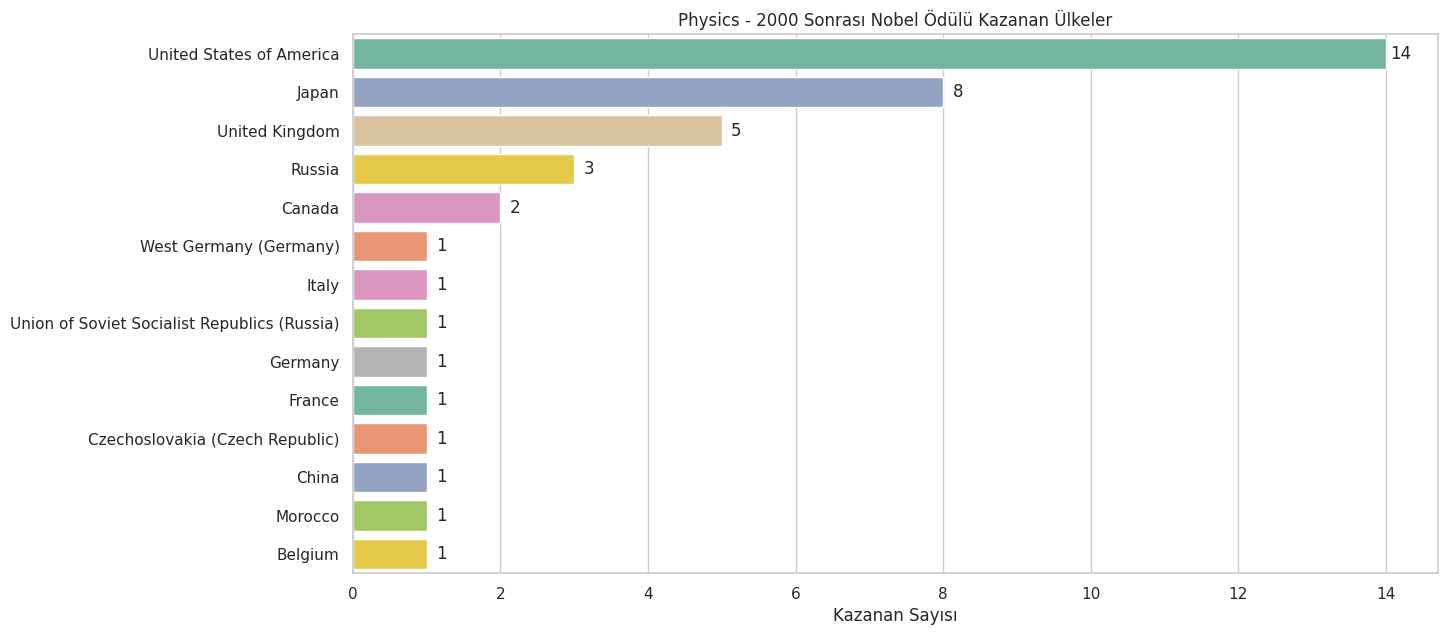

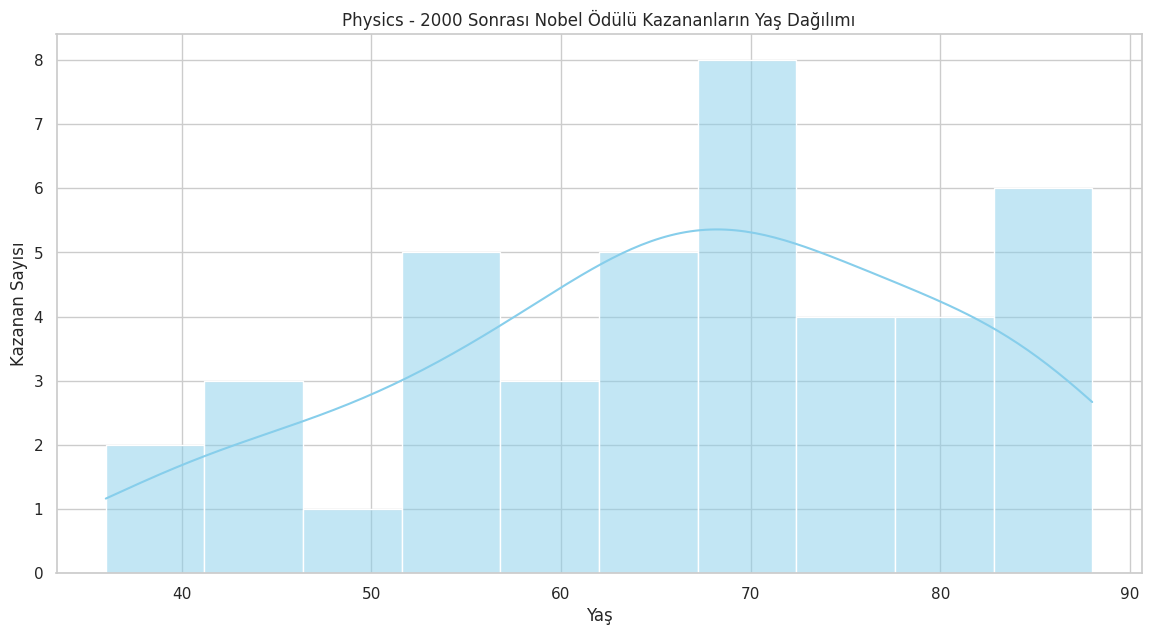

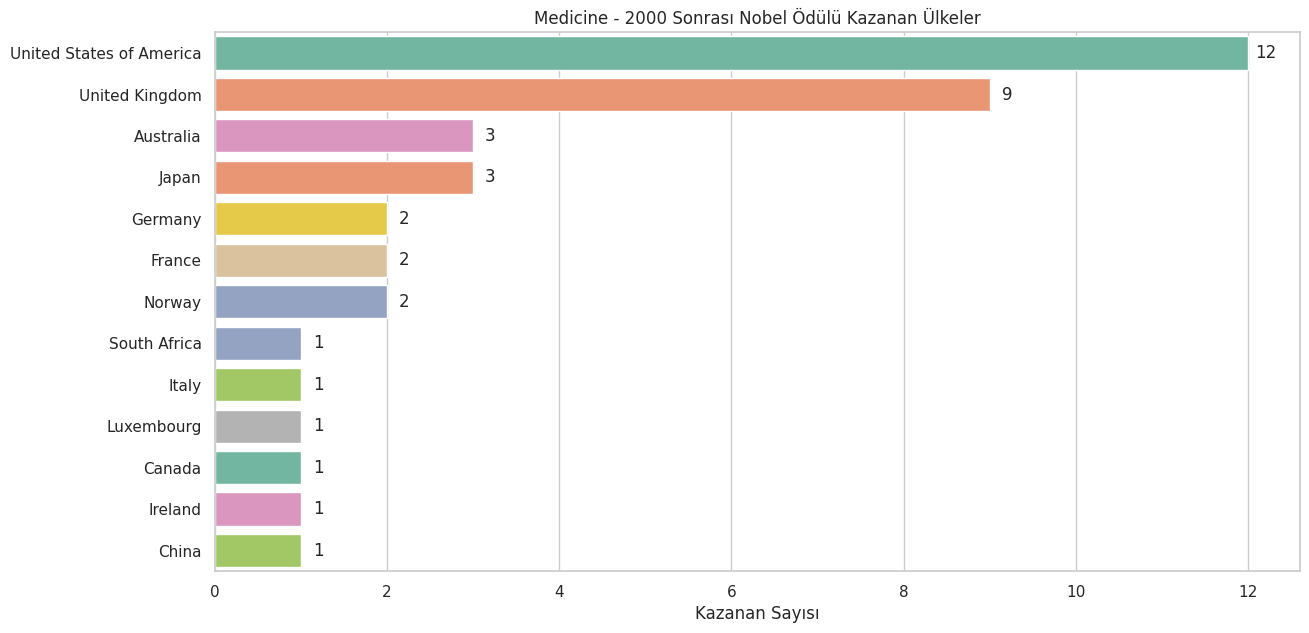

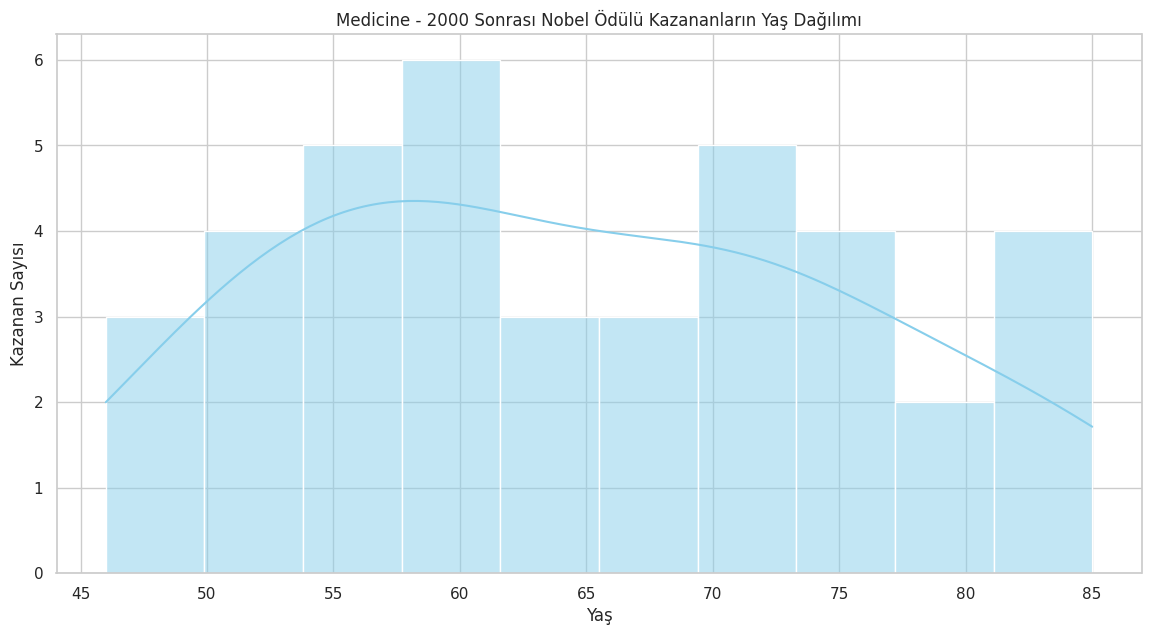

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('nobel.csv')
df_filtered = df[df['year'] > 2000]
df_filtered = df_filtered[['year', 'category', 'birth_country', 'birth_date']].dropna()
df_filtered['birth_date'] = pd.to_datetime(df_filtered['birth_date'], errors='coerce')
df_filtered['age'] = df_filtered['year'] - df_filtered['birth_date'].dt.year
categories = ['Chemistry', 'Literature', 'Peace', 'Physics', 'Medicine']

sns.set(style="whitegrid")
for category in categories:
    category_data = df_filtered[df_filtered['category'] == category]
    plt.figure(figsize=(14, 7))
    ax1 = sns.countplot(data=category_data, y='birth_country', hue='birth_country', palette='Set2', 
                        dodge=False, legend=False, order=category_data['birth_country'].value_counts().index)
    plt.title(f'{category} - 2000 Sonrası Nobel Ödülü Kazanan Ülkeler')
    plt.xlabel('Kazanan Sayısı')
    plt.ylabel('')
  
    for p in ax1.patches:
        width = p.get_width()
        plt.text(width + 0.2,
                 p.get_y() + p.get_height() / 2,
                 int(width),
                 ha='center',
                 va='center')
    
    plt.show()
    plt.figure(figsize=(14, 7))
    ax2 = sns.histplot(data=category_data, x='age', kde=True, bins=10, color='skyblue')
    plt.title(f'{category} - 2000 Sonrası Nobel Ödülü Kazananların Yaş Dağılımı')
    plt.xlabel('Yaş')
    plt.ylabel('Kazanan Sayısı')
    plt.show()
